<a href="https://colab.research.google.com/github/SooHyunLee31/dL-st/blob/Practice/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱 신경망의 시각화

In [1]:
# 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled, val_scaled, train_target, val_target  = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()

# 첫 번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

# 두 번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 은닉층과 출력층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 9s 4ms/step - loss: 0.1799 - accuracy: 0.9326 - val_loss: 0.2293 - val_accuracy: 0.9203
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1648 - accuracy: 0.9380 - val_loss: 0.2223 - val_accuracy: 0.9229
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1523 - accuracy: 0.9418 - val_loss: 0.2219 - val_accuracy: 0.9228
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1440 - accuracy: 0.9451 - val_loss: 0.2377 - val_accuracy: 0.9253
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1359 - accuracy: 0.9481 - val_loss: 0.2401 - val_accuracy: 0.9219


In [8]:
# 모델 층 출력
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [9]:
# 가중치와 절편 출력
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [10]:
# 가중치 배열의 평균과 표준편차
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.023701979 0.2776809


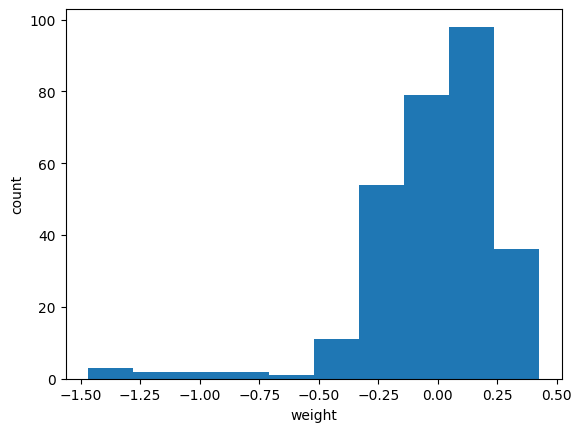

In [12]:
# 가중치 배열 분포
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

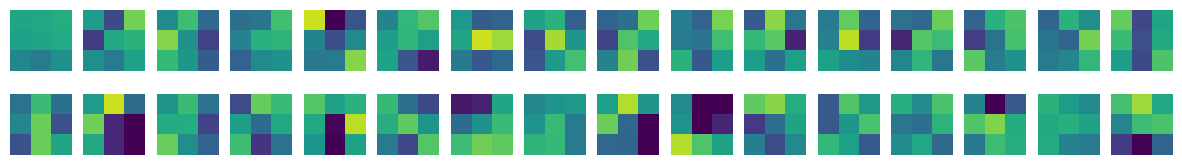

In [13]:
# 32개 커널의 가중치 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2) :
    for j in range(16) :
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

가중치의 크기 :  (3, 3, 1, 32)
가중치의 평균 :  -0.002551585 ,   가중치의 표준편차 :  0.08249365


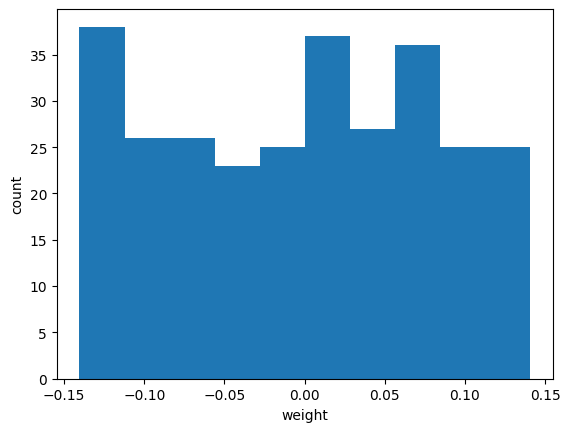

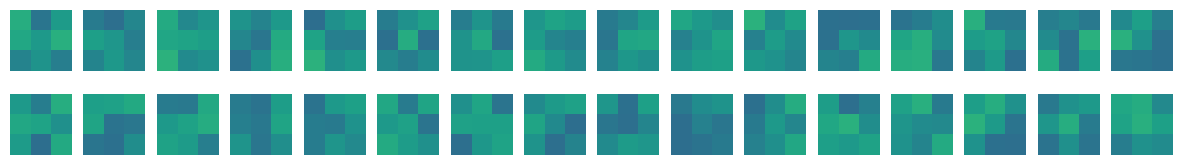

In [25]:
# 훈련하지 않은 빈 합성곱 신경망
from keras.api._v2.keras import activations
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

# 가중치의 크기 출력
no_training_conv = no_training_model.layers[0]
print('가중치의 크기 : ', no_training_conv.weights[0].shape)

# 가중치 평균, 표준편차 출력
no_training_weights = no_training_conv.weights[0].numpy()
print('가중치의 평균 : ', no_training_weights.mean(), ',   가중치의 표준편차 : ', no_training_weights.std())

# 가중치 배열 분포
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 32개 커널의 가중치 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2) :
    for j in range(16) :
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [26]:
# 모델의 입력
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [31]:
# 첫 번째 Conv2D의 출력
conv_acti = keras.Model(model.input, model.layers[0].output)
print(conv_acti)

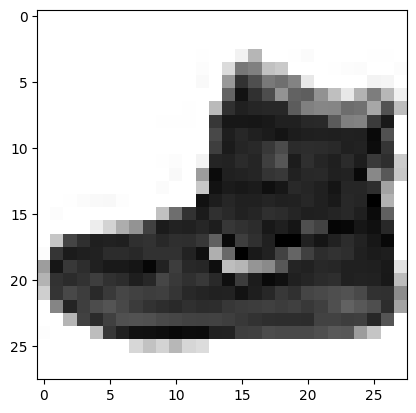

In [32]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

1/1 [==============================] - 0s 19ms/step
(1, 28, 28, 32)


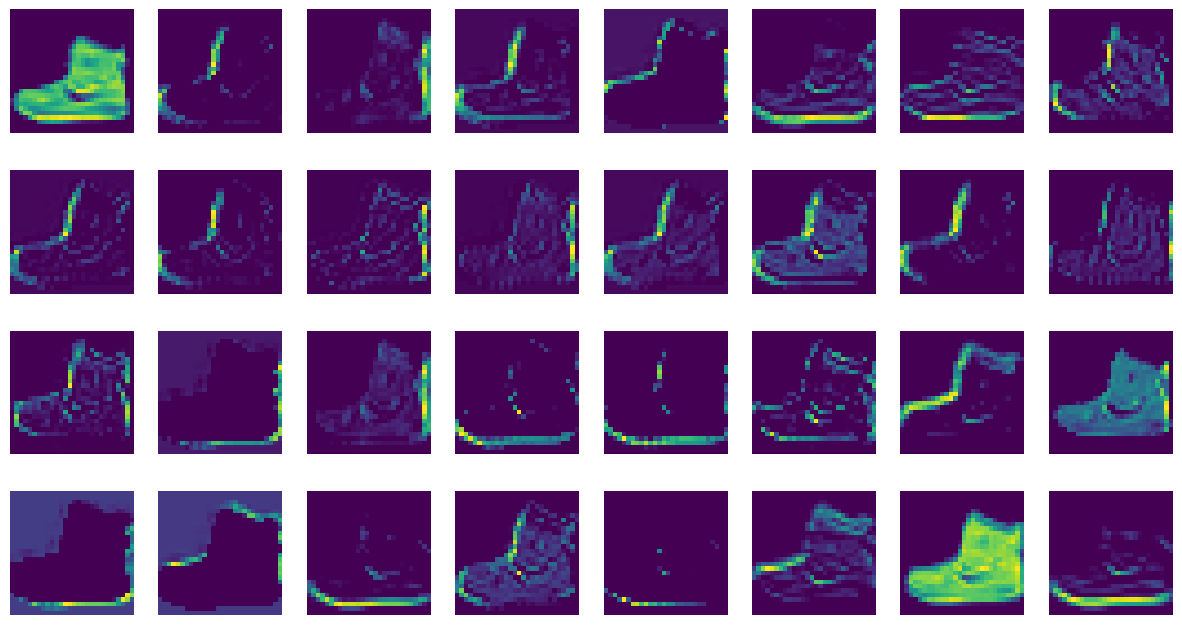

In [38]:
# 첫 번째 샘플을 첫 번째 층에 주입
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

# 32개의 특성 맵
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4) :
    for j in range(8) :
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()

1/1 [==============================] - 0s 154ms/step
(1, 14, 14, 64)


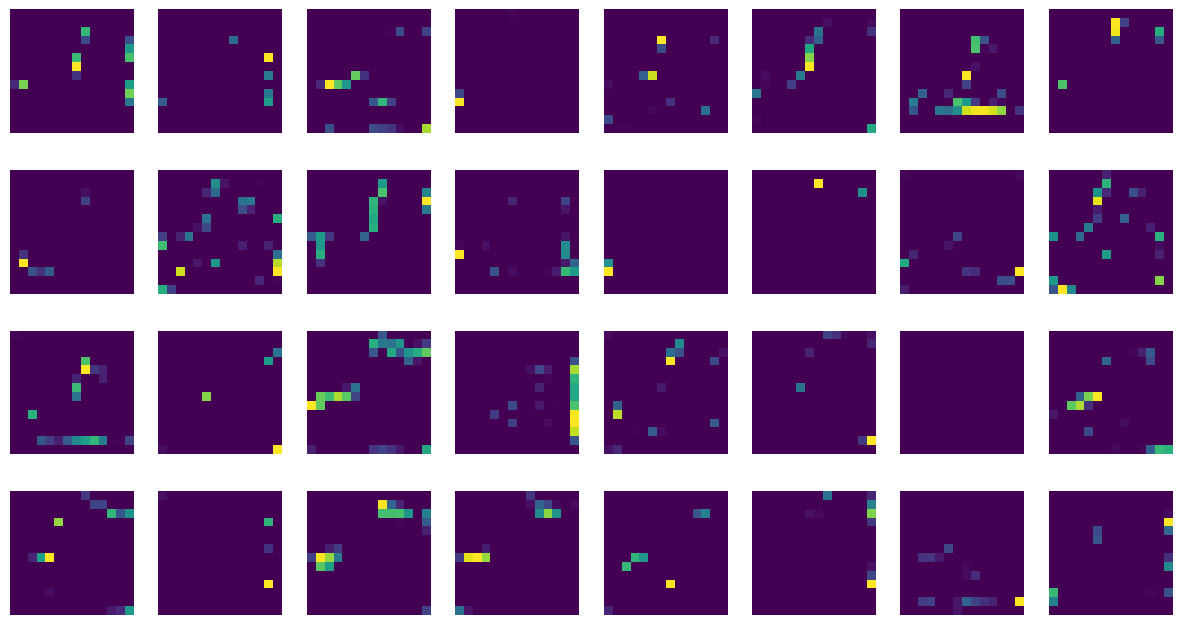

In [39]:
# 두 번째 Conv2D의 출력
conv2_acti = keras.Model(model.input, model.layers[2].output)

# 첫 번째 샘플을 두 번째 Conv2D 층에 주입
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

# 32개의 특성 맵
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4) :
    for j in range(8) :
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()